# Custom Models and Training with TensorFlow

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.4 is required in this notebook
# Earlier 2.x versions will mostly work the same, but with a few bugs
import tensorflow as tf
from tensorflow import keras
from packaging.version import Version
assert Version(tf.__version__) >= Version("2.4")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2025-09-19 15:16:03.185417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758258963.196718  476916 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758258963.200668  476916 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
# Jupyter - if you want to always print the last expression or assignment\n
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

## Using TensorFlow like NumPy

### Tensors and Operations

In [5]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])  # 2x3 matrix

I0000 00:00:1758258964.823474  476916 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14323 MB memory:  -> device: 0, name: Quadro RTX 5000 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [6]:
tf.constant(42)  # scalar

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [7]:
t.shape

TensorShape([2, 3])

In [8]:
t.dtype

tf.float32

In [9]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [10]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [11]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [12]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [13]:
# Matrix multiplication, equivalent to tf.matmul()
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### Tensors and Numpy

In [14]:
a = np.array([2., 4., 5.])

array([2., 4., 5.])

In [15]:
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [16]:
t.numpy()  # or np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [17]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [18]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### Type conversions

In [19]:
# tf.constant(2.) + tf.constant(40)  # type conversions are not done automatically to avoid degrading performances

In [20]:
#tf.constant(2.) + tf.constant(40., dtype=tf.float64)  # even adding float32 and float64 is not allowed

In [21]:
t2 = tf.constant(40., dtype=tf.float64)

<tf.Tensor: shape=(), dtype=float64, numpy=40.0>

In [22]:
tf.constant(2.) + tf.cast(t2, tf.float32)  # so we use casting

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### Variables

In [23]:
v = tf.Variable(t)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [24]:
v.assign(2*v)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [25]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [26]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

In [27]:
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

## Customizing Models and Training Algorithms

### Custom Loss Functions

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

array([[-1.15780104, -0.28673138, -0.49550877, ...,  0.38899735,
         0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973, ..., -0.11818174,
        -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788, ..., -0.67694905,
         1.00890193, -1.4271529 ],
       ...,
       [-0.90351581,  0.66256679, -0.8562583 , ...,  0.68837768,
        -0.76194926,  0.66187253],
       [ 1.56873373, -1.78978682,  0.75535703, ..., -0.18226735,
         1.34152212, -0.73747465],
       [ 1.43527981,  0.58345861,  0.10928062, ..., -0.17819366,
        -0.82285155,  0.59190517]], shape=(5160, 8))

In [29]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

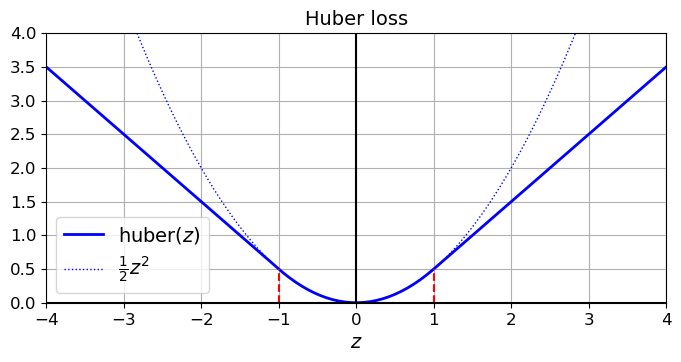

In [30]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [31]:
input_shape = X_train.shape[1:]

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

/home/ngu145/miniconda/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss=huber_fn, optimizer="nadam")
model.fit(X_train, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


I0000 00:00:1758258968.067166  481010 service.cc:148] XLA service 0x7177e40062b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758258968.067190  481010 service.cc:156]   StreamExecutor device (0): Quadro RTX 5000 with Max-Q Design, Compute Capability 7.5
2025-09-19 15:16:08.108043: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758258968.152989  481010 cuda_dnn.cc:529] Loaded cuDNN version 91300


135/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92.0956 

I0000 00:00:1758258968.485411  481010 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.3586 - val_loss: 1.3418
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0596 - val_loss: 1.3177


### Saving and Loading Models That Contain Custom Components

In [34]:
model.save("my_model_with_a_custom_loss.keras")

In [35]:
model = keras.models.load_model('my_model_with_a_custom_loss.keras', custom_objects={'huber_fn': huber_fn})

<Sequential name=sequential, built=True>

In [36]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold* tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    return huber_fn

In [37]:
model.compile(loss=create_huber(2.0), optimizer='nadam')

In [38]:
model.save('my_model_with_a_custom_loss_threshold.keras')

In [39]:
model = keras.models.load_model('my_model_with_a_custom_loss_threshold.keras',
                                custom_objects={'huber_fn': create_huber(2.0)})

/home/ngu145/miniconda/envs/tf/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 11 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [40]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold* tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, 'threshold': self.threshold}

In [41]:
model.compile(loss=HuberLoss(2.), optimizer='nadam')
model.fit(X_train, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4975 - val_loss: 1.8056
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2325 - val_loss: 1.7947


In [42]:
model.save('my_model_with_a_custom_loss_class.keras')

In [43]:
model = keras.models.load_model('my_model_with_a_custom_loss_class.keras',
                                custom_objects={'HuberLoss': HuberLoss})

<Sequential name=sequential, built=True>

In [44]:
model.fit(X_train, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2234 - val_loss: 1.7884
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1952 - val_loss: 1.7945


In [45]:
model.loss.threshold

2.0

### Custom Activation Functions, Initializers, Regularizers, and Constraints

In [46]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
def my_softplus(z):  # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

In [48]:
def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

In [49]:
def my_positive_weights(weights):  # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0, tf.zeros_like(weights), weights)

In [50]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, strength=1.0):
        self.strength = strength

    def __call__(self, weights):
            return self.strength * tf.reduce_sum(tf.abs(0.01 + weights))

In [51]:
my_l1_regularizer = MyL1Regularizer(strength=1.0)

In [52]:
class MyPositiveWeights(keras.constraints.Constraint):
    def __init__(self):
        super().__init__()

    def __call__(self, weights):
        return tf.where(weights < 0, tf.zeros_like(weights), weights)

In [53]:
my_positive_weights = MyPositiveWeights()

In [54]:
layer = keras.layers.Dense(30, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

<Dense name=dense, built=False>

### Custom Metrics

In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

<Sequential name=sequential, built=False>

In [57]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [58]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.1589 - mae: 1.2409 - val_loss: 2.9900 - val_mae: 1.0986
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.6411 - mae: 1.0056 - val_loss: 2.1219 - val_mae: 0.8278


**Note**: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:
* the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the _batch size_ (not the sum of weights, so the batch loss is _not_ the weighted mean of the losses).
* the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

In [59]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [60]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - huber_fn: 0.7526 - loss: 0.8564
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - huber_fn: 0.7815 - loss: 0.6869


In [61]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.8564316630363464, np.float64(0.3734846546196548))

**Note**: if you use the same function as the loss and a metric, you may be surprised to see different results. This is generally just due to floating point precision errors: even though the mathematical equations are equivalent, the operations are not run in the same order, which can lead to small differences. Moreover, when using sample weights, there's more than just precision errors:
* the loss since the start of the epoch is the mean of all batch losses seen so far. Each batch loss is the sum of the weighted instance losses divided by the _batch size_ (not the sum of weights, so the batch loss is _not_ the weighted mean of the losses).
* the metric since the start of the epoch is equal to the sum of weighted instance losses divided by sum of all weights seen so far. In other words, it is the weighted mean of all the instance losses. Not the same thing.

If you do the math, you will find that loss = metric * mean of sample weights (plus some floating point precision error).

In [103]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[create_huber(2.0)])

In [104]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled, y_train, epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 598us/step - loss: 0.1245 - huber_fn: 0.2515
Epoch 2/2
363/363 [==============================] - 0s 558us/step - loss: 0.1216 - huber_fn: 0.2473


In [62]:
history.history["loss"][0], history.history["huber_fn"][0] * sample_weight.mean()

(0.8564316630363464, np.float64(0.3734846546196548))

### Streaming metrics

In [63]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.800000011920929>

In [64]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [65]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [66]:
precision.variables

[<Variable path=precision/true_positives, shape=(1,), dtype=float32, value=[4.]>,
 <Variable path=precision/false_positives, shape=(1,), dtype=float32, value=[4.]>]

In [68]:
precision.reset_state()

Creating a streaming metric:

In [108]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs) # handles base args (e.g., dtype)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_variable(shape=(), initializer="zeros", name="total")
        self.count = self.add_variable(shape=(), initializer="zeros", name="count")
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(metric))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))
    def result(self):
        return self.total / self.count
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [109]:
m = HuberMetric(2.)

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]])) 

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [110]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

m.result()

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [111]:
m.variables

[<Variable path=huber_metric_3/total, shape=(), dtype=float32, value=21.0>,
 <Variable path=huber_metric_3/count, shape=(), dtype=float32, value=3.0>]

In [112]:
m.reset_state()
m.variables

[<Variable path=huber_metric_3/total, shape=(), dtype=float32, value=0.0>,
 <Variable path=huber_metric_3/count, shape=(), dtype=float32, value=0.0>]

Let's check that the `HuberMetric` class works well:

In [121]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [122]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

/home/ngu145/miniconda/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [123]:
huber_metric = HuberMetric(2.0)

<HuberMetric name=huber_metric>

In [124]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=[huber_metric])

In [125]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - huber_metric: 0.7363 - loss: 0.7363
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - huber_metric: 0.2527 - loss: 0.2527  


In [129]:
model.save("my_model_with_a_custom_metric.keras")

In [130]:
model = keras.models.load_model("my_model_with_a_custom_metric.keras",
                                custom_objects={"huber_fn": create_huber(2.0),
                                                "HuberMetric": HuberMetric})

/home/ngu145/miniconda/envs/tf/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 11 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [131]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - huber_metric: 0.2219 - loss: 0.2219
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - huber_metric: 0.2187 - loss: 0.2187


**Warning**: We can no longer use `model.metrics[-1]` to access the `huber_metric` object.

In [135]:
huber_metric.threshold

2.0

Looks like it works fine! More simply, we could have created the class like this:

In [136]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)
    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}        

This class handles shapes better, and it also supports sample weights.

In [137]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [138]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

/home/ngu145/miniconda/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential, built=True>

In [139]:
huber_metric = HuberMetric(2.0)

<HuberMetric name=HuberMetric>

In [140]:
model.compile(loss=keras.losses.Huber(2.0), optimizer="nadam", weighted_metrics=[huber_metric])

In [141]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - HuberMetric: 0.8662 - loss: 0.4298
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - HuberMetric: 0.2471 - loss: 0.1226  


In [142]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.42983460426330566, np.float64(0.4298347157242378))

In [143]:
model.save("my_model_with_a_custom_metric_v2.keras")

In [144]:
model = keras.models.load_model("my_model_with_a_custom_metric_v2.keras",
                                custom_objects={"HuberMetric": HuberMetric})

<Sequential name=sequential, built=True>

In [145]:
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32), epochs=2)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - HuberMetric: 0.2325 - loss: 0.2044
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - HuberMetric: 0.2244 - loss: 0.1977  


In [147]:
huber_metric.threshold

2.0

### Custom Layers

In [159]:
exponential_layer = keras.layers.Lambda(lambda x: tf.exp(x))

<Lambda name=lambda_2, built=False>

In [165]:
exponential_layer(tf.constant([-1., 0., 1.]))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787948, 1.        , 2.7182817 ], dtype=float32)>

Adding an exponential layer at the output of a regression model can be useful if the values to predict are positive and with very different scales (e.g., 0.001, 10., 10000):

In [166]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [167]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5


/home/ngu145/miniconda/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1497 - val_loss: 0.8168
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7061 - val_loss: 0.5985
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5802 - val_loss: 0.5210
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5251 - val_loss: 0.4780
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4892 - val_loss: 0.4489
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4698


0.4698306620121002

In [183]:
class MyDense(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros")
        super().build(batch_input_shape) # must be at the end

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        return tf.TensorShape(list(batch_input_shape)[:-1] + [self.units])

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units,
                "activation": keras.activations.serialize(self.activation)}

In [184]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [185]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

/tmp/ipykernel_476916/2050359931.py:3: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential, built=True>

In [186]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.0945 - val_loss: 0.7001
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5917 - val_loss: 0.8804
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5201


0.5201001763343811

In [187]:
model.save("my_model_with_a_custom_layer.keras")

In [188]:
model = keras.models.load_model("my_model_with_a_custom_layer.keras",
                                custom_objects={"MyDense": MyDense})

<Sequential name=sequential, built=True>

In [189]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # Debugging of custom layer
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

Our custom layer can be called using the functional API like this:

In [190]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

Note that the `call()` method receives symbolic inputs, whose shape is only partially specified (at this stage, we don't know the batch size, which is why the first dimension is `None`):

We can also pass actual data to the custom layer. To test this, let's split each dataset's inputs into two parts, with four features each:

In [191]:
def split_data(data):
    columns_count = data.shape[-1]
    half = columns_count // 2
    return data[:, :half], data[:, half:]

X_train_scaled_A, X_train_scaled_B = split_data(X_train_scaled)
X_valid_scaled_A, X_valid_scaled_B = split_data(X_valid_scaled)
X_test_scaled_A, X_test_scaled_B = split_data(X_test_scaled)

# Printing the splitted data shapes
X_train_scaled_A.shape, X_train_scaled_B.shape

((11610, 4), (11610, 4))

Now notice that the shapes are fully specified:

In [192]:
outputs1, outputs2 = MyMultiLayer()((X_train_scaled_A, X_train_scaled_B))

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


Let's build a more complete model using the functional API (this is just a toy example, don't expect awesome performance):

In [198]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=(X_train_scaled_A.shape[-1],))
input_B = keras.layers.Input(shape=(X_train_scaled_B.shape[-1],))
hidden_A, hidden_B = MyMultiLayer()((input_A, input_B))
hidden_A = keras.layers.Dense(30, activation='selu')(hidden_A)
hidden_B = keras.layers.Dense(30, activation='selu')(hidden_B)
concat = keras.layers.Concatenate()((hidden_A, hidden_B))
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

<Functional name=functional, built=True>

In [199]:
model.compile(loss='mse', optimizer='nadam')

In [200]:
model.fit((X_train_scaled_A, X_train_scaled_B), y_train, epochs=2,
          validation_data=((X_valid_scaled_A, X_valid_scaled_B), y_valid))

Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2136  X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9103 - val_loss: 1.0493
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9651 - val_loss: 1.2143


Now let's create a layer with a different behavior during training and testing:

In [201]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

Here's a simple model that uses this custom layer:

In [202]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.0),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(1)
])

<Sequential name=sequential, built=False>

In [203]:
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.5380 - val_loss: 1.0304
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0146 - val_loss: 0.8973
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8372


0.8371509909629822

## Custom Models

In [204]:
X_new_scaled = X_test_scaled

array([[-1.15780104, -0.28673138, -0.49550877, ...,  0.38899735,
         0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973, ..., -0.11818174,
        -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788, ..., -0.67694905,
         1.00890193, -1.4271529 ],
       ...,
       [-0.90351581,  0.66256679, -0.8562583 , ...,  0.68837768,
        -0.76194926,  0.66187253],
       [ 1.56873373, -1.78978682,  0.75535703, ..., -0.18226735,
         1.34152212, -0.73747465],
       [ 1.43527981,  0.58345861,  0.10928062, ..., -0.17819366,
        -0.82285155,  0.59190517]], shape=(5160, 8))

In [257]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.n_layers = n_layers
        self.n_neurons = n_neurons
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

    def get_config(self):
        config = super().get_config()
        config.update({"n_layers": self.n_layers, "n_neurons": self.n_neurons})
        return config

    # from_config is often not strictly necessary if get_config returns all init args
    # but can be useful for more complex deserialization logic
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [258]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.output_dim = output_dim
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

    def get_config(self):
        config = super().get_config()
        config.update({"output_dim": self.output_dim})
        return config

In [259]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [260]:
model = ResidualRegressor(output_dim=1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 79.5359 
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2356
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3871
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3139
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9542
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1898
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.022673 ],
       [1.767132 ],
       [2.8417523],
       ...,
       [2.5619361],
       [3.0854838],
       [2.9541574]], shape=(5160, 1), dtype=float32)

In [261]:
model.save("my_custom_model.keras")

In [262]:
model = keras.models.load_model("my_custom_model.keras",
                               custom_objects={"ResidualRegressor": ResidualRegressor})

<ResidualRegressor name=residual_regressor, built=True>

In [263]:
history = model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8089
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6762
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6102
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5621
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5351


We could have defined the model using the sequential API instead:

In [264]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [265]:
block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])

<Sequential name=sequential, built=False>

In [266]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
score = model.evaluate(X_test_scaled, y_test)
y_pred = model.predict(X_new_scaled)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 16.9880
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9563
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6969
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9744
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0874
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0459
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.2426869],
       [1.3886064],
       [4.1836233],
       ...,
       [1.6053339],
       [3.4663227],
       [4.0061903]], shape=(5160, 1), dtype=float32)